# London Airbnb Dataset Exploration

# Analysis Part-I

In this we are going to analyze the data set sith respect to features for modelling.
We will start with importing all the necessary packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,8]

Firstly we will be looking at the data and try to gain some basic information about it.

In [14]:
df=pd.read_csv('newyork_airbnb.csv')

In [15]:
print(df.shape)

(85207, 106)


# Feature Engineering 

Now we will be looking our data with the feeling to get some of the features for analysis and to look whether it will play a crucial role for our model or not.
So try to look at the features with less missing values and afterwards we will be going see how to take care of the missing values.

In [21]:
# features with missing values 
print(df.isnull().sum()[df.isnull().sum() > 0])

print('----------------------------------------------------------------------------------')

# features with no missing values
print(df.isnull().sum()[df.isnull().sum() == 0])

name                               24
summary                          4887
space                           26153
description                      3033
neighborhood_overview           30416
notes                           53105
transit                         31125
access                          40829
interaction                     35385
house_rules                     36500
thumbnail_url                   85207
medium_url                      85207
xl_picture_url                  85207
host_name                          28
host_since                         28
host_location                     237
host_about                      36551
host_response_time              36642
host_response_rate              36642
host_acceptance_rate            22184
host_is_superhost                  28
host_thumbnail_url                 28
host_picture_url                   28
host_neighbourhood              19300
host_listings_count                28
host_total_listings_count          28
host_has_pro

In [24]:
# We create an array with the features we want to keep.
selected_features = ['name', 'neighbourhood_cleansed', 'room_type', 'guests_included', 'minimum_nights',
                     'number_of_reviews', 'review_scores_rating', 'amenities', 'property_type',
                     'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price']
selected_df= df.copy()[selected_features]
selected_df.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)
selected_df[:2]

,name,neighbourhood,room_type,guests_included,minimum_nights,number_of_reviews,review_scores_rating,amenities,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,price
0,Holiday London DB Room Let-on going,Islington,Private room,1,1,21,97.0,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",Apartment,2,1.0,1.0,0.0,Real Bed,$65.00
1,Bright Chelsea Apartment. Chelsea!,Kensington and Chelsea,Entire home/apt,2,10,89,96.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Apartment,2,1.0,1.0,1.0,Real Bed,$100.00


Now we will see what are the condition of our selected features in terms of missing values.

In [25]:
selected_df.isnull().sum()

name                       24
neighbourhood               0
room_type                   0
guests_included             0
minimum_nights              0
number_of_reviews           0
review_scores_rating    23085
amenities                   0
property_type               0
accommodates                0
bathrooms                 132
bedrooms                  151
beds                      947
bed_type                    3
price                       0
dtype: int64

Above our columns are looking pretty good accept for review_scores_rating which have too much of Null values we will see how to manage null values through this.

Now the next thing we are going to take a brief look over data types

In [26]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85207 entries, 0 to 85206
Data columns (total 15 columns):
name                    85183 non-null object
neighbourhood           85207 non-null object
room_type               85207 non-null object
guests_included         85207 non-null int64
minimum_nights          85207 non-null int64
number_of_reviews       85207 non-null int64
review_scores_rating    62122 non-null float64
amenities               85207 non-null object
property_type           85207 non-null object
accommodates            85207 non-null int64
bathrooms               85075 non-null float64
bedrooms                85056 non-null float64
beds                    84260 non-null float64
bed_type                85204 non-null object
price                   85207 non-null object
dtypes: float64(4), int64(4), object(7)
memory usage: 7.5+ MB


Above price is object but it should be float so we will be looking after it.

In [31]:
# seeing some values in price first
print(selected_df['price'][:2])
print('\n\n\n')
# price values contain $ and , in it so we will replace them

selected_df['price']=selected_df['price'].apply(lambda x: x.replace('$',''))
selected_df['price']=selected_df['price'].apply(lambda x: float(x.replace(',','')))

# seeing some statistics over price
print(selected_df['price'].describe())

0     65.0
1    100.0
Name: price, dtype: float64




count    85207.000000
mean       128.951800
std        306.939736
min          0.000000
25%         46.000000
50%         81.000000
75%        140.000000
max      20471.000000
Name: price, dtype: float64


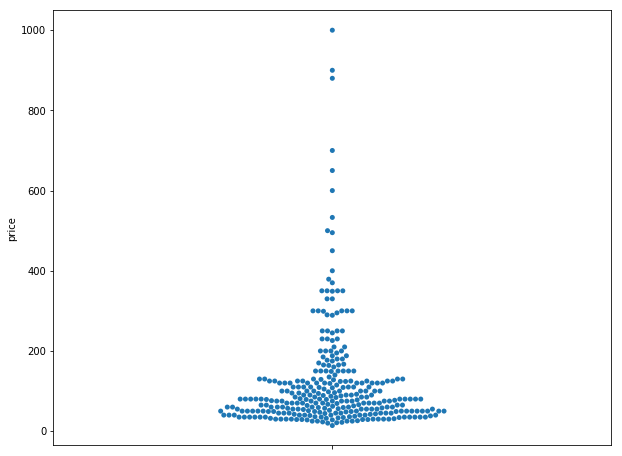

In [37]:
# seeing distribution of price
sns.swarmplot(y=selected_df['price'].sample(300))
plt.show()

# Exploration and Visualization


Now we are going to explore and visualize some relations of prices with the predictors.

firstly we are going to see the relationship between price and neighbourhood because we can think of it in terms neighbourhood affects price in every aspect of a property.

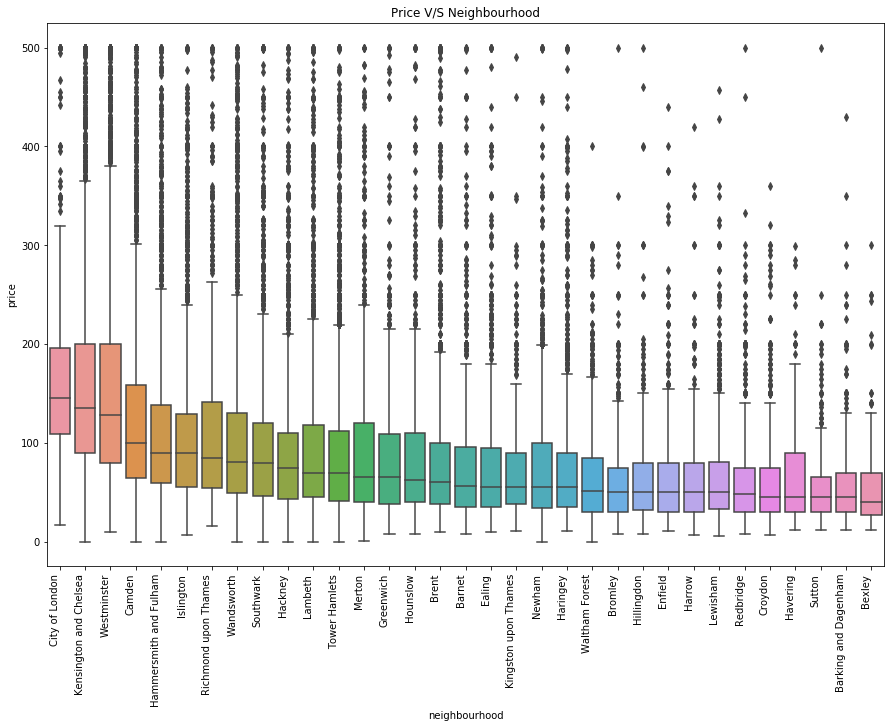

In [43]:
# First, we get the median values of the price per neighbourhood and sort them descending 
# to use them as the graph index.
price_neighbourhood = selected_df.query('price <= 500')\
                    .groupby('neighbourhood')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

# Then we filter the data to use only the prices within a certain range to avoid outliers         
data = selected_df.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them in a descending
# way.
plt.figure(figsize=(15,10))
sns.boxplot(y=data['price'], x=data['neighbourhood'], order=price_neighbourhood)

# now will be giving title and get the plot axes and modify them to rotate the labels orientation
plt.title('Price V/S Neighbourhood',fontsize=12)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

Now we will look the similar relation between price and room type so we can ensure the dependency of this feature to our model and naturally room type also a big factor in deciding the price of a property

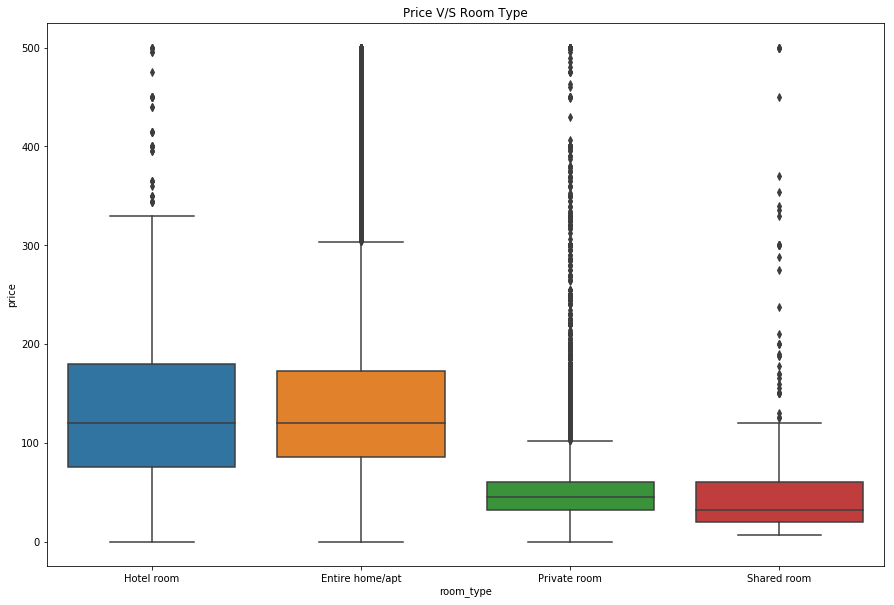

In [46]:

# First, we get the median values of the price per neighbourhood and sort them descending 
# to use them as the graph index.
room_price = selected_df.query('price <= 500')\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
                
# Then we filter the data to use only the prices within a certain range to avoid outliers        
data = selected_df.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them descending.
plt.figure(figsize=(15,10))
sns.boxplot(y=data['price'], x=data['room_type'], order=room_price)
plt.title('Price V/S Room Type',fontsize=12)
plt.show()

Now same relationship ie. between price and no. of bedrooms

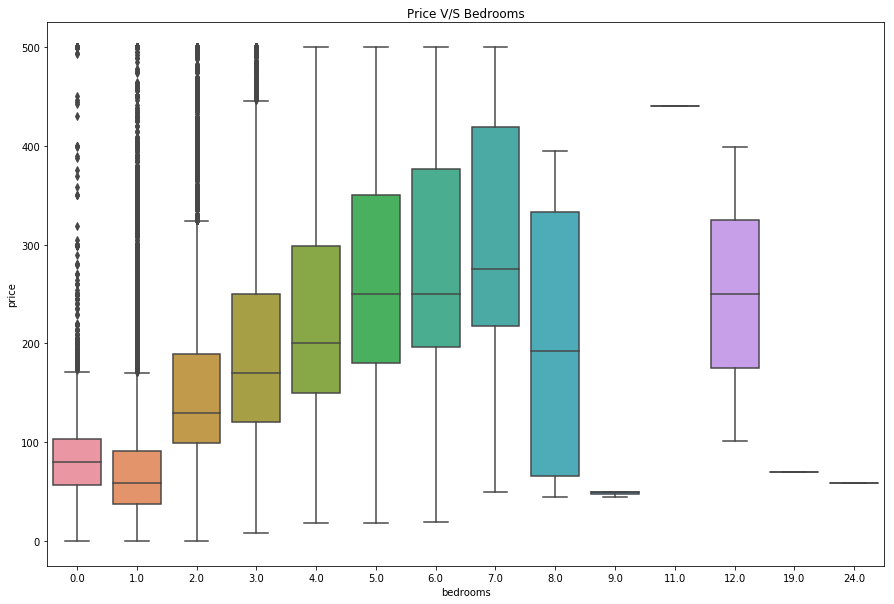

In [47]:
# Then we filter the data to use only the prices within a certain range to avoid outliers        
data = selected_df.query('price <= 500')

# We use seaborn boxplot to generate the graph, passing as parameters the target variable and 
# the feature we want to associate, and an additonal parameter "order" to plot them descending.
plt.figure(figsize=(15,10))
sns.boxplot(y=data['price'], x=data['bedrooms'])
plt.title('Price V/S Bedrooms',fontsize=12)
plt.show()

# Conclusion

From the swarm plot, we can see that the prices are concentrated around the 0\$ - 200\$ dollars interval. 

The beautiful boxplot between price and neighbourhood tells us which are the most affordable neighbourhoods and which are the most premium ones and also distribution is consistent so it could mean that this feature play some crucial rolew towards ouyr model.

The boxplot between room_type and price shows a very realisitic thing that the complete apartment or property will be expensive in compare to private and shared rooms also there is not much difference between the price for a private and a shared room so one can go for private room for most of the time.

And last, from the bedrooms/price box plot, the prices are split in a consistent way. That could be another interesting feature for the model because, for example, decision trees find the best feature splits to model the prices distribution according to the predictor features. This graph indicates that the price of the property increases as the number of bedrooms increases (A kind of obvious observation) but with some different behaviour around 7 to 10 bedrooms since there is probably a limited amount of listings with that number of bedrooms.
